In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import miceforest as mf

sns.set()

In [78]:
response_vars_df1 = pd.read_csv("data/imputed_response_df_iter1")
response_vars_df1.shape

(3671, 226)

In [79]:
predictor_vars_df1 = pd.read_csv("data/imputed_predictor_df_iter0")
predictor_vars_df1.shape

(3671, 226)

In [92]:
def create_composite_vars(full_df,predictor=False,trs="w2"):
    if predictor:
        trs = ""
        full_df.columns = [("_").join(col.split("_")[1:]) for col in full_df.columns]
    
    de_var_names = [col for col in full_df.columns if "DE" in col]
    full_df["DE_sum"] = full_df.loc[:,de_var_names].sum(axis=1)

    binary_positive_vars = [(str(col).upper())+"_DUMMY1" for col in ("dncl10w2,dncl11w2,dncl12w2,pncl1w2,pncl2w2,"+\
                            "pncl7w2,pncl12w2,pncl13w2,cscaw2,clhcw2,flihcw2,tomenw2,"+\
                            "tomepgw2,tomelnw2,tomesuw2,tomehdw2,dncl9w2,dncl10w2,dncl11w2,"+\
                            "dncl12w2,cbnpw2".replace("w2",trs)).split(",")]
    binary_negative_vars = [(str(col).upper())+"_DUMMY1" for col in ("dncl1w2,dncl2w2,dncl3w2,dncl4w2,dncl5w2,dncl6w2,"+\
                            "dncl7w2,dncl8w2,dncl14w2,pncl3w2,pncl4w2,pncl5w2,pncl6w2,cilw2,cflw2,"+\
                            "cmosw2,cbiw2,cgiw2,tomeew2,tomempw2,tomergw2,"+\
                            "tomerbw2,tomemfw2,tomepmw2,tomethpw2,tomerew2,tomesgw2"\
                                                                     .replace("w2",trs)).split(",")]
    cat3_positive_vars = [col+str(i) for col in [(str(col).upper())+"_DUMMY" for col in \
                          ("infdw2,infcw2".replace("w2",trs))\
                                                 .split(",")] for i in range(1,3)]
    cat4_positive_vars = [col+str(i) for col in [(str(col).upper())+"_DUMMY" for col in \
                          ("dn9w2,dn10w2,dn11w2,dn12w2".replace("w2",trs))\
                                                 .split(",")] for i in range(1,4)]
    cat4_negative_vars = [col+str(i) for col in [(str(col).upper())+"_DUMMY" for col in \
                          ("dn14w2,dn1w2,dn2w2,dn3w2,dn4w2,dn5w2,dn6w2,dn7w2,dn8w2".replace("w2",trs))\
                                                 .split(",")]\
                           for i in range(1,4)]
    cat5_positive_vars = [col+str(i) for col in [(str(col).upper())+"_DUMMY" for col in \
                          ("pn1w2,pn2w2,pn10w2,pn11w2,pn12w2,pn13w2".replace("w2",trs)).split(",")]\
                          for i in range(1,5)]
    cat5_negative_vars = [col+str(i) for col in [(str(col).upper())+"_DUMMY" for col in \
                          ("pn3w2,pn4w2,pn5w2,pn6w2,pn7w2,pn9w2".replace("w2",trs)).split(",")]\
                           for i in range(1,5)]
    #cat3_negative_vars: none

    full_df["binary_vars"] = full_df.loc[:,binary_positive_vars]\
    .sum(axis=1) - full_df.loc[:,binary_negative_vars].sum(axis=1)

    full_df["composite_conflict_score"] = full_df["binary_vars"] - \
    (full_df["DE_sum"] * 0.25)

    return full_df

# TODO: Add 2< cat variables

In [90]:
response_comp_df1 = create_composite_vars(response_vars_df1)
response_comp_df1.shape

(3671, 229)

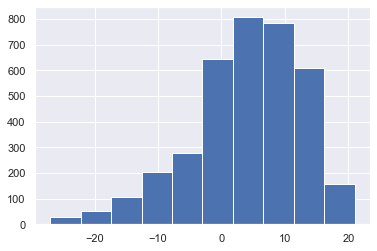

In [91]:
response_comp_df1["binary_vars"].hist()
plt.show()

In [83]:
response_comp_df1["DE_sum"].describe()

count    3671.000000
mean        0.691637
std         2.962294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        81.000000
Name: DE_sum, dtype: float64

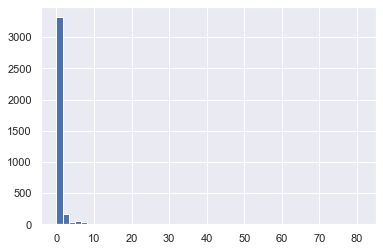

In [84]:
response_comp_df1["DE_sum"].hist(bins=50)
plt.show()

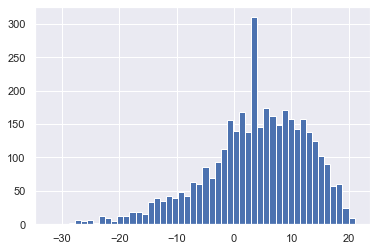

In [85]:
response_comp_df1["composite_conflict_score"].hist(bins=50)
plt.show()

In [ ]:
predictor_comp_df1 = 